# Homework 4


### Luyao Wang
Netid: lw337

In [1]:
from functools import partial

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from skimage import filters, transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

In [2]:
%matplotlib inline

## Here is how to load and display the Chinese equivalent to MNIST

Data has been collected by K. Nazarpour and M. Chen at Newcastle university:
https://data.ncl.ac.uk/articles/dataset/Handwritten_Chinese_Numbers/10280831/1
Preprocessing was done by Gabriel Preda:
https://www.kaggle.com/data/174582


In [3]:
# if you have problems with the visualization of the Chinese characters use mplfont
# from https://github.com/Clarmy/mplfonts
# pip install mplfonts
# mplfonts init

# if you have problems with displaying minus signs in the exponents of numbers, uncomment the next two lines
from mplfonts import use_font

use_font("Noto Serif CJK SC")

In [4]:
# loading images and labels
with open("X.npy", "rb") as np_file:
    x = np.load(np_file)

with open("y.npy", "rb") as np_file:
    y = np.load(np_file)

# loading dictionaries to display numerical values and characters
import json

with open("value_dict.json", "r") as json_file:
    value_dict = json.load(json_file)

with open("char_dict.json", "r") as json_file:
    char_dict = json.load(json_file)

number_char = len(char_dict)
print("number of classes:", number_char)

number of classes: 15


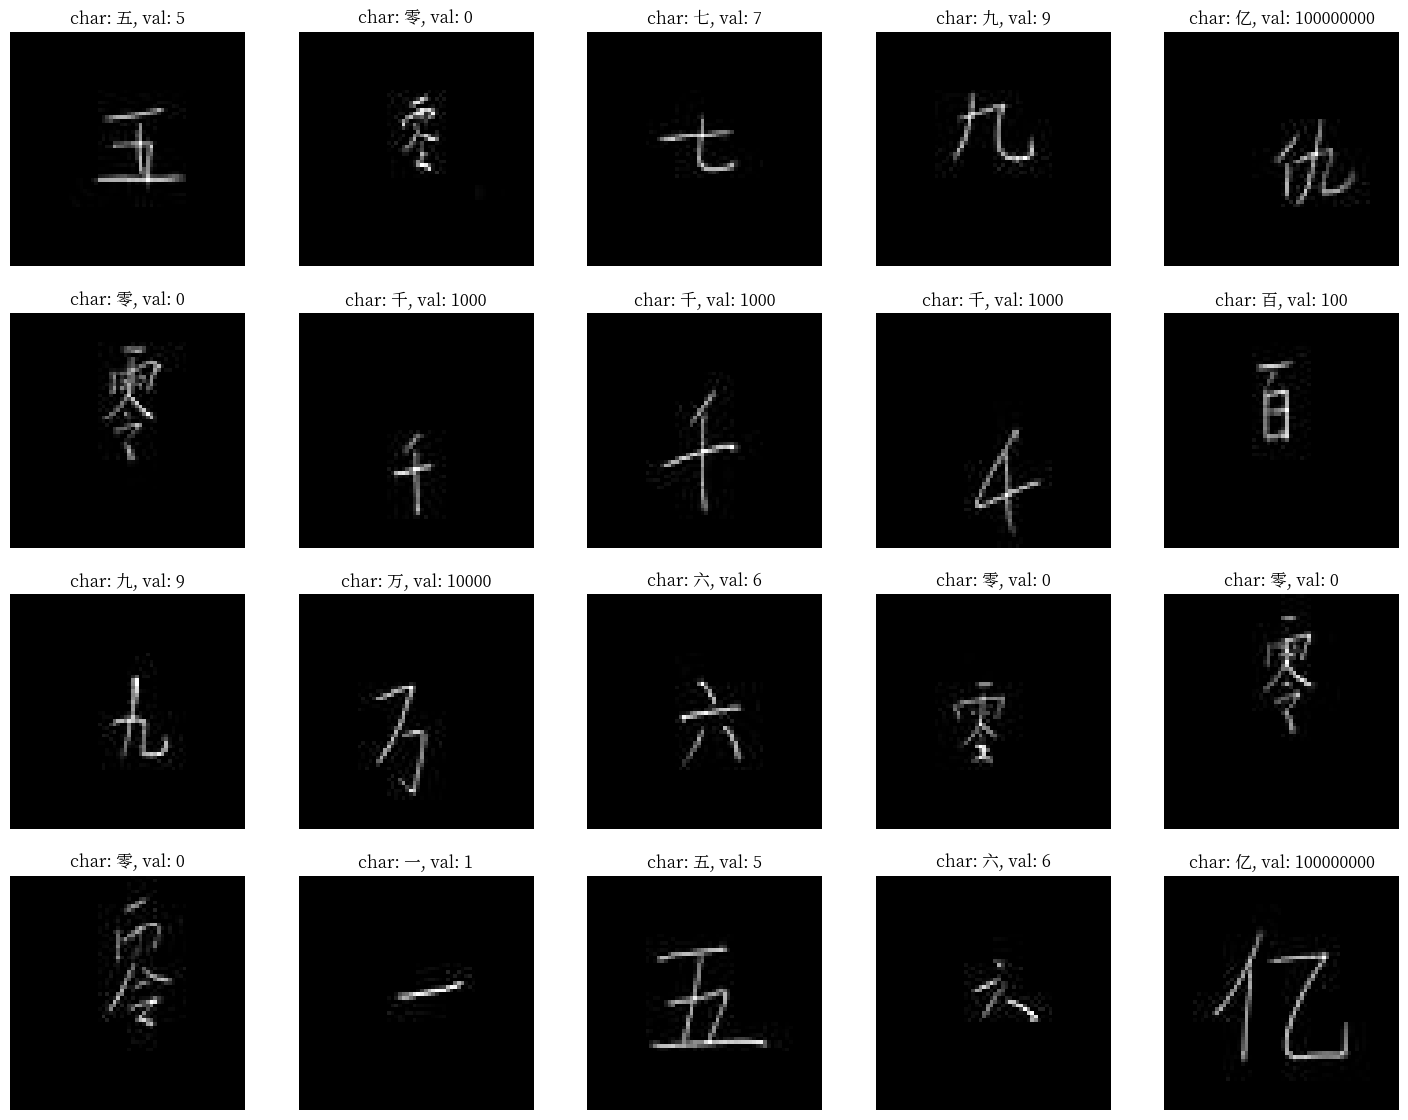

In [5]:
# preview the images
plt.figure(figsize=(18, 14))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x[i].reshape((64, 64)), cmap="gray")
    key = str(y[i])
    plt.title("char: {}, val: {}".format(char_dict[key], value_dict[key]))
    plt.axis("off")
plt.show()

In [6]:
# this array can be used for labeling the confusion matrix using seaborn
axis_labels = [
    char_dict["0"],
    char_dict["1"],
    char_dict["2"],
    char_dict["3"],
    char_dict["4"],
    char_dict["5"],
    char_dict["6"],
    char_dict["7"],
    char_dict["8"],
    char_dict["9"],
    char_dict["10"],
    char_dict["11"],
    char_dict["12"],
    char_dict["13"],
    char_dict["14"],
]
# you might also want to use: plt.yticks(rotation=0)

## 1) Chinese MNIST, classical computer vision

**(5 points)**

The aim of this exercise is to identify hand written Chinese characters representing numbers. And we do this the classical, pre-neural network way of computer vision: In part a) and b) we extract some meaningful features from each image. In part c) we train a random forest to use these features to do the classification.

**a)** The features we want to extract are the parameters of the three most occupied lines of the image, extracted with a Hough transform. We first do this for a single image which you obtain by reshaping the first row of X into an image with 64 by 64 pixels. Apply an Otsu binarization to this image and display both original and binarized version.

Next, do a Hough transformation of the image with 360 tested angles (use a shifted range: _np.linspace( 0.1, np.pi+0.1 , 360, endpoint=False)_ ). Then use _hough_line_peaks_ with a minimal distance of 7, a minimal angle of 40, a threshold of 0 and a number of peaks of 3 to identify the three most occupied lines in the image. Draw those lines into a binarized version of the image.  
(_1 point_)

**b)** Copy _preview the images_ cell from above and modify it to draw the three most occupied lines into the first 20 images of the dataset. (_0.5 points_)

Then create a new data matrix to use with the random forest classifier: _X_new_, which has a row for each image and 9 columns. The first three columns are the occupancies of the 3 lines, the second three are their angles, and the third three are their distances. (_1.5 points_)

**c)** Do a 0.7/0.3 train/test split with _X_new_ and _y_. Train a random forest classifier using 500 estimators. Make a prediction for the test data, measure the accuracy on the test data and plot the confusion matrix. (_2 points_)


**ANSWER**


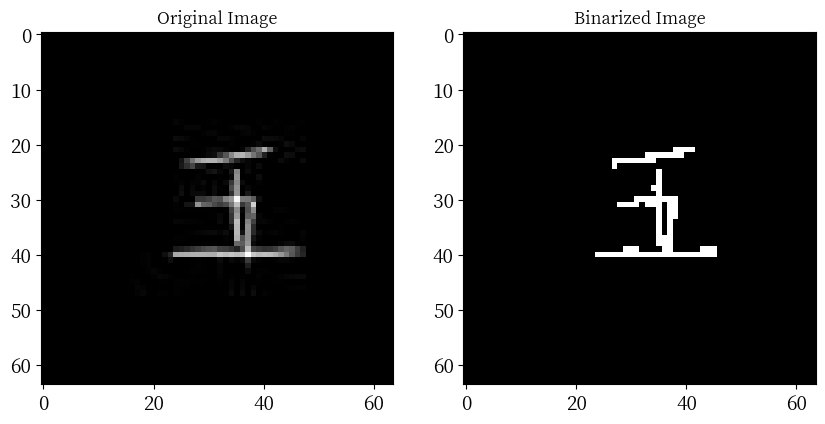

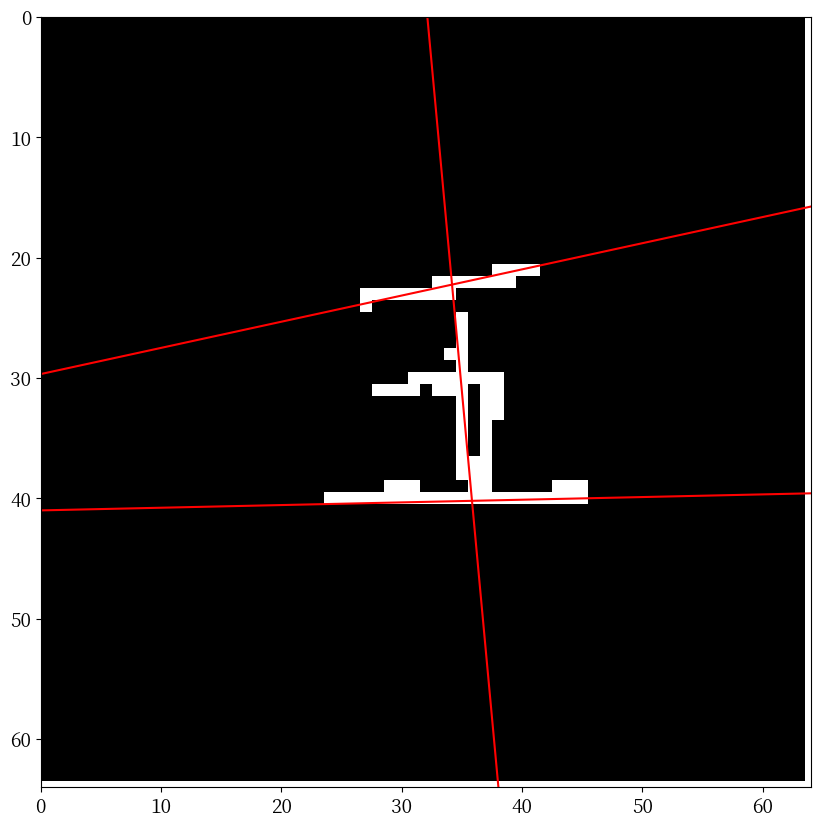

In [7]:
img = x[0].reshape(64, 64)
thresh = filters.threshold_otsu(img)
binary_img = img > thresh

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[1].imshow(binary_img, cmap="gray")
axes[1].set_title("Binarized Image")
plt.show()

angles = np.linspace(0.1, np.pi + 0.1, 360, endpoint=False)

hough_line_partial = partial(transform.hough_line, theta=angles)

hough_space, theta, rho = hough_line_partial(binary_img)

hough_line_peaks_partial = partial(
    transform.hough_line_peaks, min_distance=7, min_angle=40, threshold=0, num_peaks=3
)

line_peaks, line_angles, line_dists = hough_line_peaks_partial(hough_space, theta, rho)

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(binary_img, cmap="gray")

for angle, dist in zip(line_angles, line_dists):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - binary_img.shape[1] * np.cos(angle)) / np.sin(angle)
    ax.plot((0, binary_img.shape[1]), (y0, y1), "-r")

    plt.xlim((0, binary_img.shape[1]))
    plt.ylim((binary_img.shape[0], 0))

plt.show()

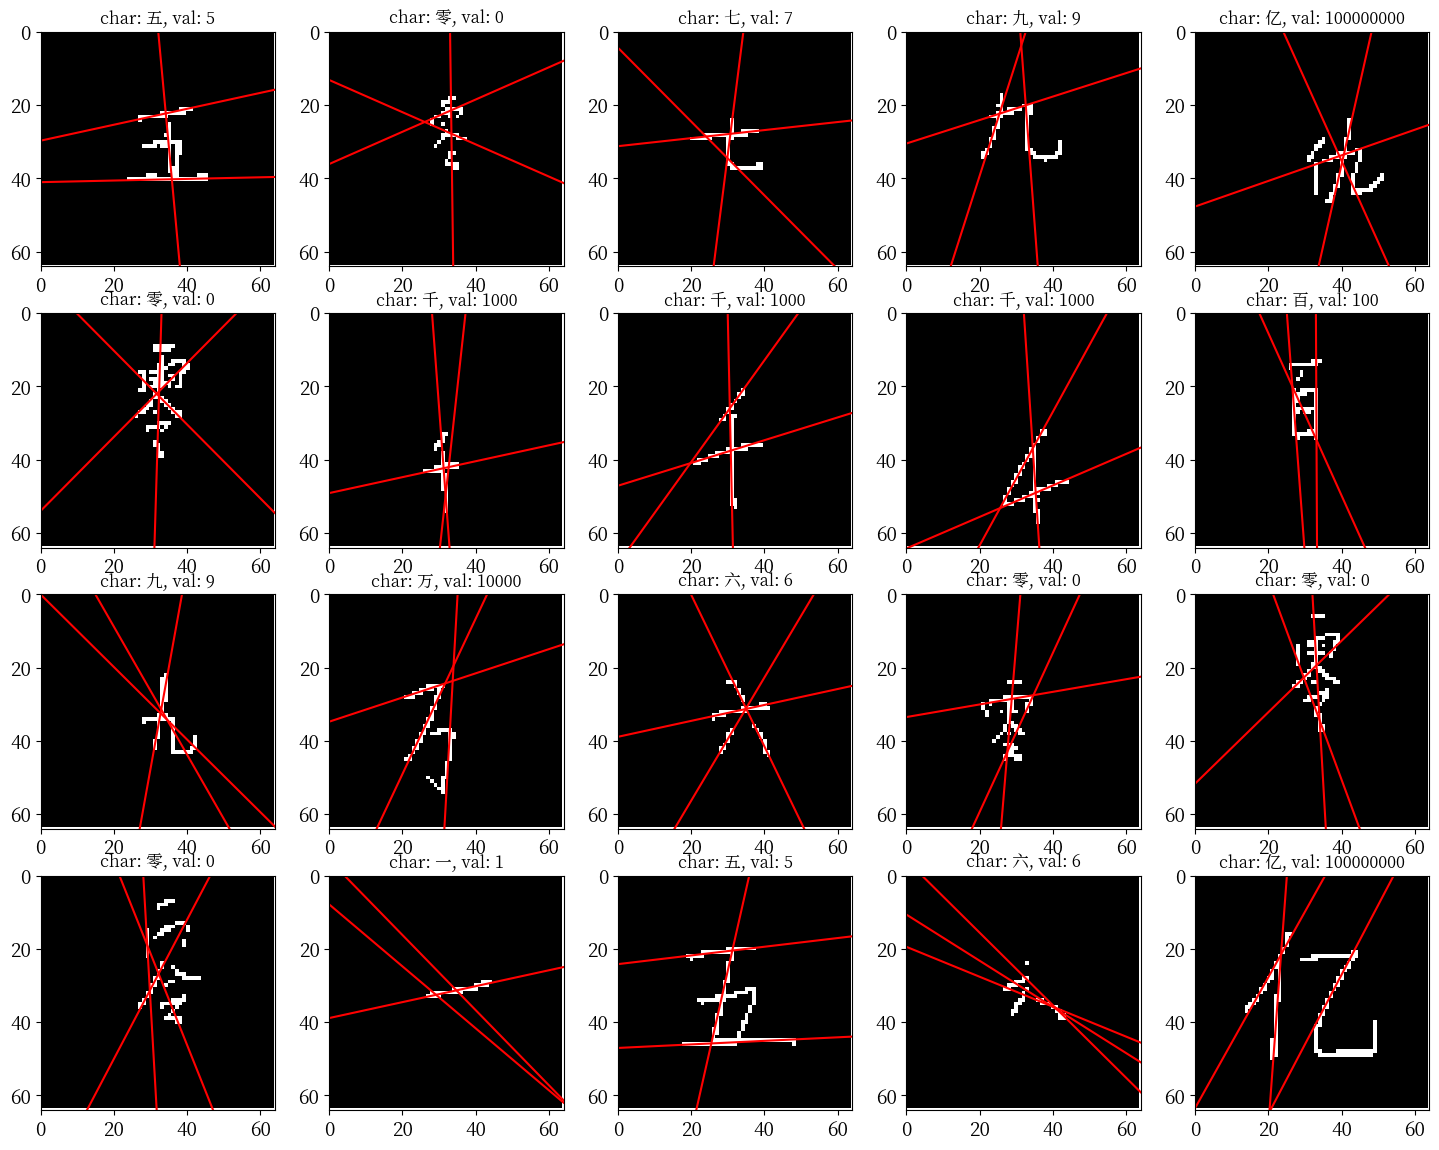

In [8]:
plt.figure(figsize=(18, 14))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    img = x[i].reshape((64, 64))
    thresh = filters.threshold_otsu(img)
    binary_img = img > thresh
    h, theta, d = hough_line_partial(binary_img)
    peaks, angles, dists = hough_line_peaks_partial(h, theta, d)
    plt.imshow(binary_img, cmap="gray")

    plt.xlim((0, binary_img.shape[1]))
    plt.ylim((binary_img.shape[0], 0))

    for j, (angle, dist) in enumerate(zip(angles, dists)):
        key = str(y[i])
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - binary_img.shape[1] * np.cos(angle)) / np.sin(angle)
        plt.title("char: {}, val: {}".format(char_dict[key], value_dict[key]))
        plt.plot((0, binary_img.shape[1]), (y0, y1), "-r")

In [9]:
x_new = np.zeros((len(x), 9))

for i in range(len(x)):
    image = x[i].reshape((64, 64))
    threshold = filters.threshold_otsu(image)
    binary_image = image > threshold
    h, theta, d = hough_line_partial(binary_image)
    peaks, angles, dists = hough_line_peaks_partial(h, theta, d)
    x_new[i, :3] = peaks
    x_new[i, 3:6] = angles
    x_new[i, 6:] = dists

print(x_new)

[[ 22.  17.  15. ...  41. -32.  29.]
 [ 10.   9.   8. ... -33.  33.  12.]
 [ 19.  13.   8. ...  31.  34.   3.]
 ...
 [ 16.  15.  12. ... -25.  49.  33.]
 [ 14.  14.  11. ...  35.  42. -11.]
 [ 13.   4.   3. ...  37.  14.  -5.]]


Accuracy: 0.7662222222222222


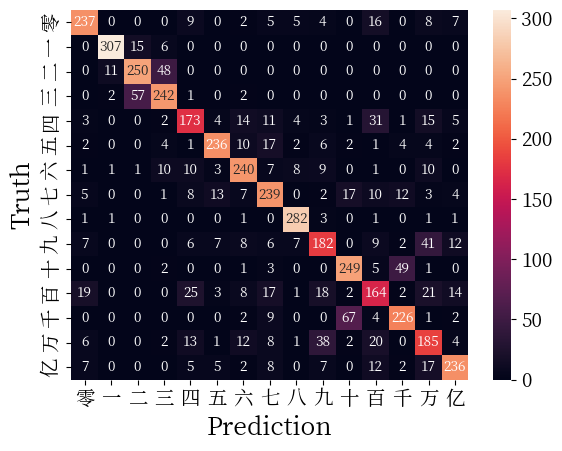

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y, test_size=0.3, random_state=42
)

clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

## 2) Tracking an object with the correlation function

**(5 points)**

Aim of this assignment is to show you how to track a given object using the correlation function.

**a) First you need to collect your raw data**

Place a small object on a sheet of white paper. Place your camera/smartphone on a solid support such that it only observes the object and is not moving. Take a series of at least ten images, either by using the burst mode on your camera, or by pressing the shutter repeatedly. While you take the images, slowly pull on the sheet of paper such that the object moves through your field of view. The direction and the total length does not matter. But try to have the white paper as a background for the full series. Watch move_2.avi to get an idea how the images could look.

Next create a movie from your own images: Open Fiji. Click on File - Import - Image Sequence. Choose the directory with your images and open the first one. Fiji opens the Sequence Options window, make sure that Sort Names Numerically is clicked. Press ok and Fiji loads all of your images into one window. With the slider at the bottom of that window you can watch them.

Press File - Save as - AVI. Choose a Frame rate of 2 fps and Compression JPEG. Press OK and give the movie a name.
Submit that movie as part of your homework.
(_ 2 points_)

**b) Find the position of the object in the first image by using the correlation function**

In order to minimize the potential for misunderstandings, I have added the images I have created using my data in the accompanying _HW_correlation_images.pdf_.

Load the first image, convert it to gray values and invert it; this image is called _gray_ in the following. (The inversion is necessary because we do not want to track the white background.) Then cut out a smaller image which contains only the object you want to track (called _obj_). Display both images (see slide Images 1 in the correlation.pdf). (_0.5 point_)

Compute the correlation (named _result_) between the _gray_ and _obj_ by using multiplication in Fourier space. Visualize both _result_ and a binarization with a threshold of 95 % of the maximum of _result_ (see slide Images 2).
(_1 point_)

The maximum of the correlation is located at the bottom right corner of _obj_. In order to get the center coordinates
in the _gray_ coordinate system you need to shift the position by half of the _obj_ dimensions. The following code gives you the row and column position of the maximum:

```python
ind = np.unravel_index(np.argmax(result, axis=None), result.shape)
row = int(ind[0] - obj.shape[0]/2)
col = int(ind[1] - obj.shape[1]/2)
```

Then use _cv2.circle_ to draw into _gray_ a red, filled point of diameter 10 pixels at the position of the maximum. Remember the x,y convention used in opencv. Display the image. (cf. slide Image 3) (_0.5 points_)

**c) Analyze the full sequence of your images.**

Load a copy of the final image of your series. Write a for loop going over all your images and for each compute the correlation with _obj_. Draw for each maximum a circle into your final image.
After finishing the loop, display your resulting image. (cf. slide Images 4)
(_1 point_)


**ANSWER**


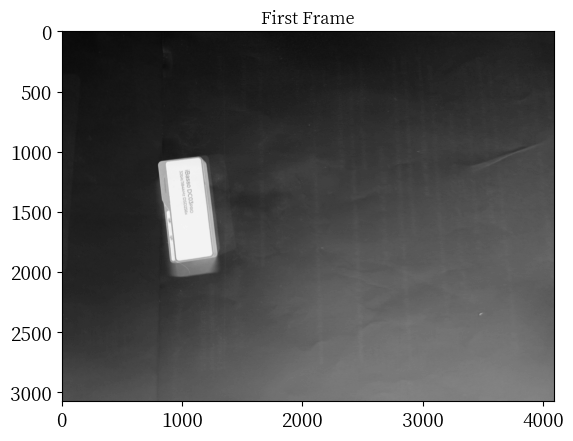

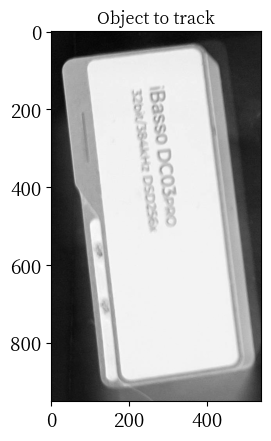

In [12]:
cap = cv2.VideoCapture("1.avi")

ret, frame = cap.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

plt.imshow(gray, cmap="gray")
plt.title("First Frame")
plt.show()

cap.release()

x, y, w, h = 770, 1010, 540, 950
obj = gray[y : y + h, x : x + w]

plt.imshow(obj, cmap="gray")
plt.title("Object to track")
plt.show()

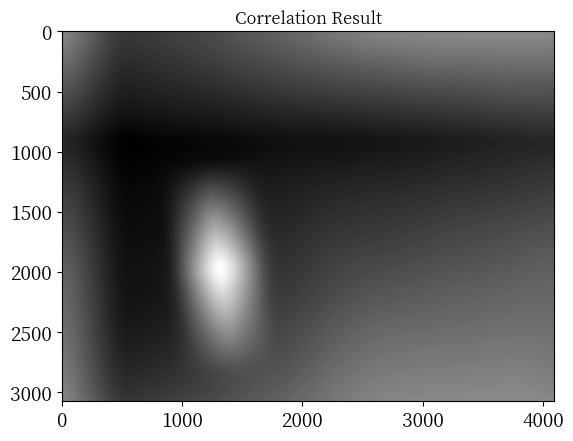

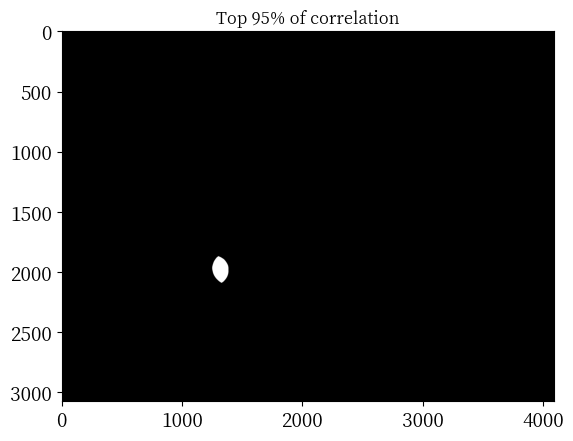

In [13]:
import numpy as np
from skimage.transform import rotate

obj_rotate = rotate(obj, 180)
obj_fft = np.fft.fft2(obj_rotate, gray.shape)

gray_fft = np.fft.fft2(gray)

result = np.abs(np.fft.ifft2(gray_fft * obj_fft))

plt.imshow(result, cmap="gray")
plt.title("Correlation Result")
plt.show()

threshold = 0.95 * result.max()
binary_result = result > threshold

plt.imshow(binary_result, cmap="gray")
plt.title(r"Top 95% of correlation")
plt.show()

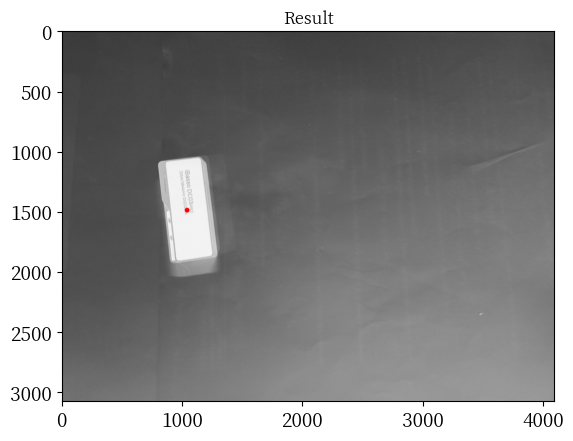

In [14]:
ind = np.unravel_index(np.argmax(result, axis=None), result.shape)
row = int(ind[0] - obj.shape[0] / 2)
col = int(ind[1] - obj.shape[1] / 2)

gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
marked = cv2.circle(gray_rgb, (col, row), 20, (255, 0, 0), -1)

plt.imshow(marked)
plt.title("Result")
plt.show()

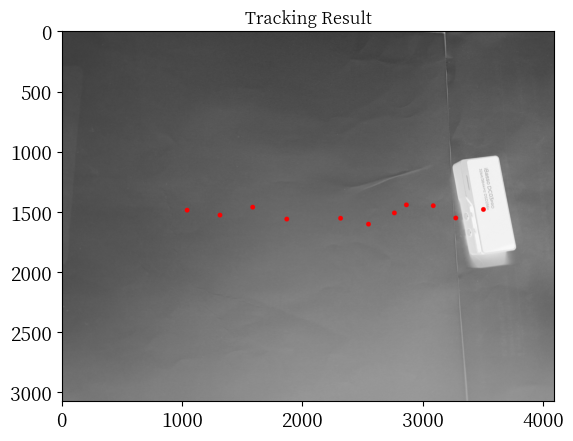

In [15]:
cap = cv2.VideoCapture("1.avi")

positions = []

cap = cv2.VideoCapture("1.avi")

while (result := cap.read())[0]:
    ret, frame = result

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    obj_fft = np.fft.fft2(obj_rotate, gray.shape)

    gray_fft = np.fft.fft2(gray)
    result = np.fft.ifft2(gray_fft * obj_fft)
    result = np.abs(result)

    ind = np.unravel_index(np.argmax(result, axis=None), result.shape)
    row = int(ind[0] - obj.shape[0] / 2)
    col = int(ind[1] - obj.shape[1] / 2)

    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    positions.append((col, row))

cap.release()

last_frame_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

for position in positions:
    last_frame = cv2.circle(last_frame_rgb, position, 20, (255, 0, 0), -1)

plt.imshow(last_frame, cmap="gray")
plt.title("Tracking Result")
plt.show()